# Choix du consommateur

Nous allons regarder un petit exemple de choix du consommateur avec une fonction d'utilité qu'on nomme CES (constant elasticity of substitution)

In [0]:
import numpy as np
from matplotlib import pyplot as plt

La fonction d'utilité est donnée par: 
$$u(X,Y) = \left(X^{\rho} + Y^{\rho} \right)^{\tfrac{1}{\rho}} $$

Voici quelques fonctions qui permettent de comprendre cette fonction d'utilité

In [0]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)
def mu_x(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(x**(rho-1.0))
def mu_y(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(y**(rho-1.0))
def tms(x,y,rho):
    return - (x/y)**(rho-1.0)


On peut faire un graphique de cette fonction avec ce qu'on appelle un contour plot et meshgrid...

In [0]:
xs = np.linspace(1.0,50.0,50)
ys = xs
X, Y = np.meshgrid(xs, ys)

In [0]:
rho = 0.2
U = u(X,Y,rho)

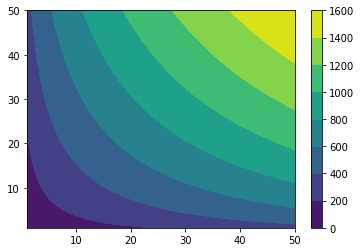

In [0]:
cp = plt.contourf(X, Y, U)
plt.colorbar(cp)

Faisons aussi un graphique de la valeur absolue du TMS en fonction de $X/Y$ (puisqu'il dépend seulement du ratio). 

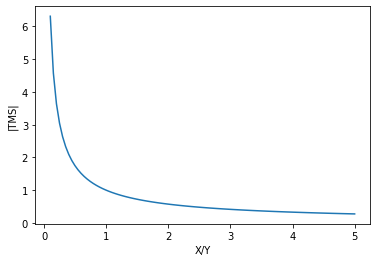

In [0]:
plt.figure()
yfix = 10
tmss = [-tms(x*yfix,yfix,rho) for x in np.linspace(0.1,5,100)]
plt.plot(np.linspace(0.1,5,100),tmss)
plt.xlabel('X/Y')
plt.ylabel('|TMS|')
plt.show()

On a vue qu'une condition pour un optimum est que $|TMS| = \tfrac{p_X}{p_Y}$. Donc, 

$$ \frac{X}{Y} = \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}} $$

Cec nous donne le mix optimal de $X$ et $Y$ à l'optimum. Mais il manque la contrainte pour fixer les deux quantités. On a :

$$ p_X \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}}Y + p_Y Y = I $$

Et donc, dénotant $r = \frac{\rho}{\rho-1}$: 

$$ \left(p_X^r p_Y^{1-r} + p_Y \right) Y = I $$



$$ Y^* = \frac{p_Y^{r-1}}{ p_X^r + p_Y^r }I $$

et 


$$ X^* = \frac{p_X^{r-1}}{ p_X^r + p_Y^r }I $$


# Relation Prix

On peut regarder comment varie lea demandes avec les deux prix $p_X$ et $p_Y$. La valeur de $\rho$ est très importante...

In [0]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 

On fait une petite expérience ou l'on varie $\rho$ et on regarde comment la demande se comporte en fonction de son prix et du prix de l'autre bien.

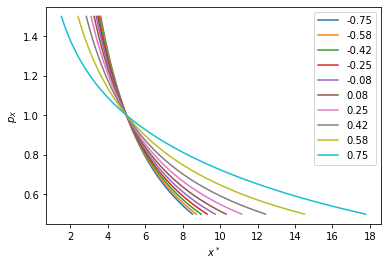

In [0]:
prices = np.linspace(0.5,1.5,100)
I = 10.0
rhos = np.linspace(-0.75,0.75,10)
plt.figure()
for rho in rhos: 
  xstars = [xstar(p,1.0,I,rho) for p in prices]
  plt.plot(xstars,prices,label=str(np.round(rho,2)))
plt.xlabel('$x^*$')
plt.ylabel('$p_X$')
plt.legend()
plt.show()

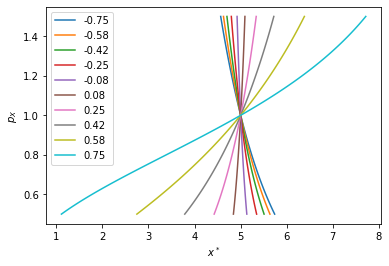

In [0]:
prices = np.linspace(0.5,1.5,100)
I = 10.0
rhos = np.linspace(-0.75,0.75,10)
plt.figure()
for rho in rhos: 
  xstars = [xstar(1.0,p,I,rho) for p in prices]
  plt.plot(xstars,prices,label=str(np.round(rho,2)))
plt.xlabel('$x^*$')
plt.ylabel('$p_X$')
plt.legend()
plt.show()

Donc un $\rho>0$ donne des biens substituts et $\rho<0$, des biens complémentaires. Regardons le choix du consommateur dans l'espace $X,Y$. 

In [0]:
px = 1.0
py = 1.0
I = 10.0
rho = 0.5
xopt = xstar(px,py,I,rho)
yopt = ystar(px,py,I,rho)
vopt = u(xopt,yopt,rho)

In [0]:
def bud(x,px,py,I):
    return I/py - px/py * x

In [0]:
def indf(x,v,rho):
    return (v**rho - x**rho)**(1.0/rho)

In [0]:
xs = np.linspace(1.0,10.0,100)

In [0]:
yb = [bud(x,px,py,I) for x in xs]

In [0]:
ys = [indf(x,vopt,rho) for x in xs]

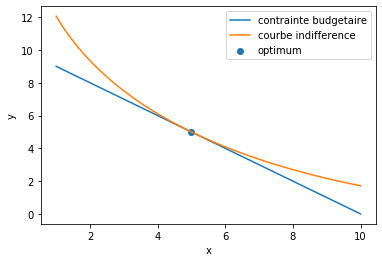

In [0]:
plt.figure()
plt.plot(xs,yb,label='contrainte budgetaire')
plt.plot(xs,ys,label='courbe indifference')
plt.scatter(xopt,yopt,label='optimum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

La fonction CES est très utilisée en choix du consommateur et du producteur. 